In [22]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os.path as osp

In [23]:
data_path = '../data'

In [24]:
time = joblib.load(osp.join(data_path, 'time.bin'))

In [25]:
state = joblib.load(osp.join(data_path, 'state.bin'))

In [26]:
des_state = joblib.load(osp.join(data_path, 'des_state.bin'))

In [27]:
target = np.array([-4, 1])
matches = np.all(des_state[:2, :] == target[:, None], axis=0)

In [28]:
np.where(matches)[0]

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,  5150, 10150,
       15150, 20150, 25150])

In [29]:
lap_idx = np.array([15,  5150, 10150, 15150, 20150, 25150])

In [30]:
for i in range(len(lap_idx)-1):
    print(lap_idx[i],lap_idx[i+1])

15 5150
5150 10150
10150 15150
15150 20150
20150 25150


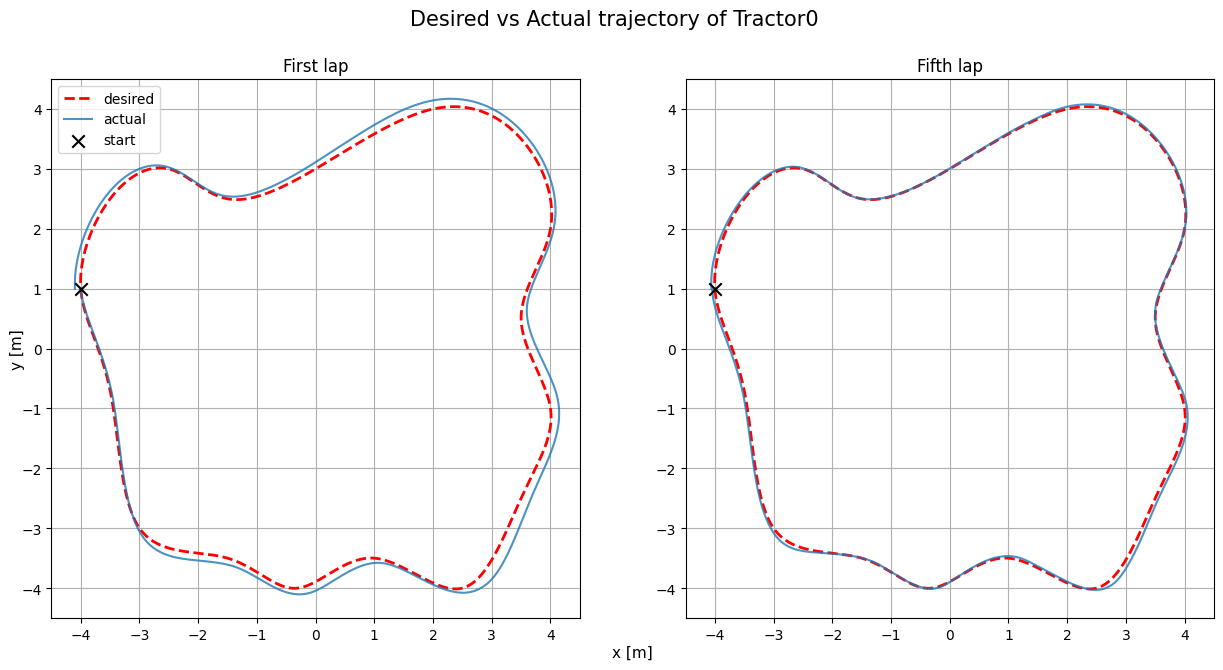

In [32]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("First lap")
ax[0].plot(des_state[0, :][lap_idx[0]:lap_idx[1]],
           des_state[1, :][lap_idx[0]:lap_idx[1]], label="desired", color="red",  linestyle='dashed', linewidth=2)
ax[0].plot(state[0, :][lap_idx[0]:lap_idx[1]],
           state[1, :][lap_idx[0]:lap_idx[1]], label=f"actual",  linewidth=1.5, alpha=0.8)

ax[0].grid(True)
ax[0].set_xlim(-4.5, 4.5)
ax[0].set_ylim(-4.5, 4.5)
# ax[0].axis("equal")
ax[0].set_xlabel('x [m]', fontsize=11)  # Set X label
ax[0].set_ylabel('y [m]', fontsize=11)  # Set Y label

ax[0].scatter([-4], [1], [80], zorder=10, marker="x",
              label="start", color='black')

# Position the Y label in the top left corner
# Adjust these values to fine-tune the position
ax[0].yaxis.set_label_coords(-0.05, 0.5)

# Position the X label in the middle of the plot
# Adjust these values to fine-tune the position
ax[0].xaxis.set_label_coords(1.1, -0.05)

ax[1].set_title("Fifth lap")
ax[1].plot(des_state[0, :][lap_idx[0]:lap_idx[1]],
           des_state[1, :][lap_idx[0]:lap_idx[1]], color="red", linestyle='dashed', linewidth=2)
ax[1].plot(state[0, :][lap_idx[-2]:lap_idx[-1]],
           state[1, :][lap_idx[-2]:lap_idx[-1]], linewidth=1.5, alpha=0.8)
ax[1].scatter([-4], [1], [80], zorder=10, marker="x", color='black')


ax[1].grid(True)
ax[1].set_xlim(-4.5, 4.5)
ax[1].set_ylim(-4.5, 4.5)
# ax[1].axis("equal")


ax[0].legend()
fig.suptitle("Desired vs Actual trajectory of Tractor0", fontsize=15)
plt.savefig(osp.join(data_path, "des_vs_actual_traj.pdf"), dpi=500, bbox_inches='tight')
plt.show()

In [33]:
beta_l = joblib.load(osp.join(data_path, 'beta_l.bin'))
beta_l_pred = joblib.load(osp.join(data_path, 'beta_l_pred.bin'))

beta_r = joblib.load(osp.join(data_path, 'beta_r.bin'))
beta_r_pred = joblib.load(osp.join(data_path, 'beta_r_pred.bin'))

alpha = joblib.load(osp.join(data_path, 'alpha.bin'))
alpha_pred = joblib.load(osp.join(data_path, 'alpha_pred.bin'))

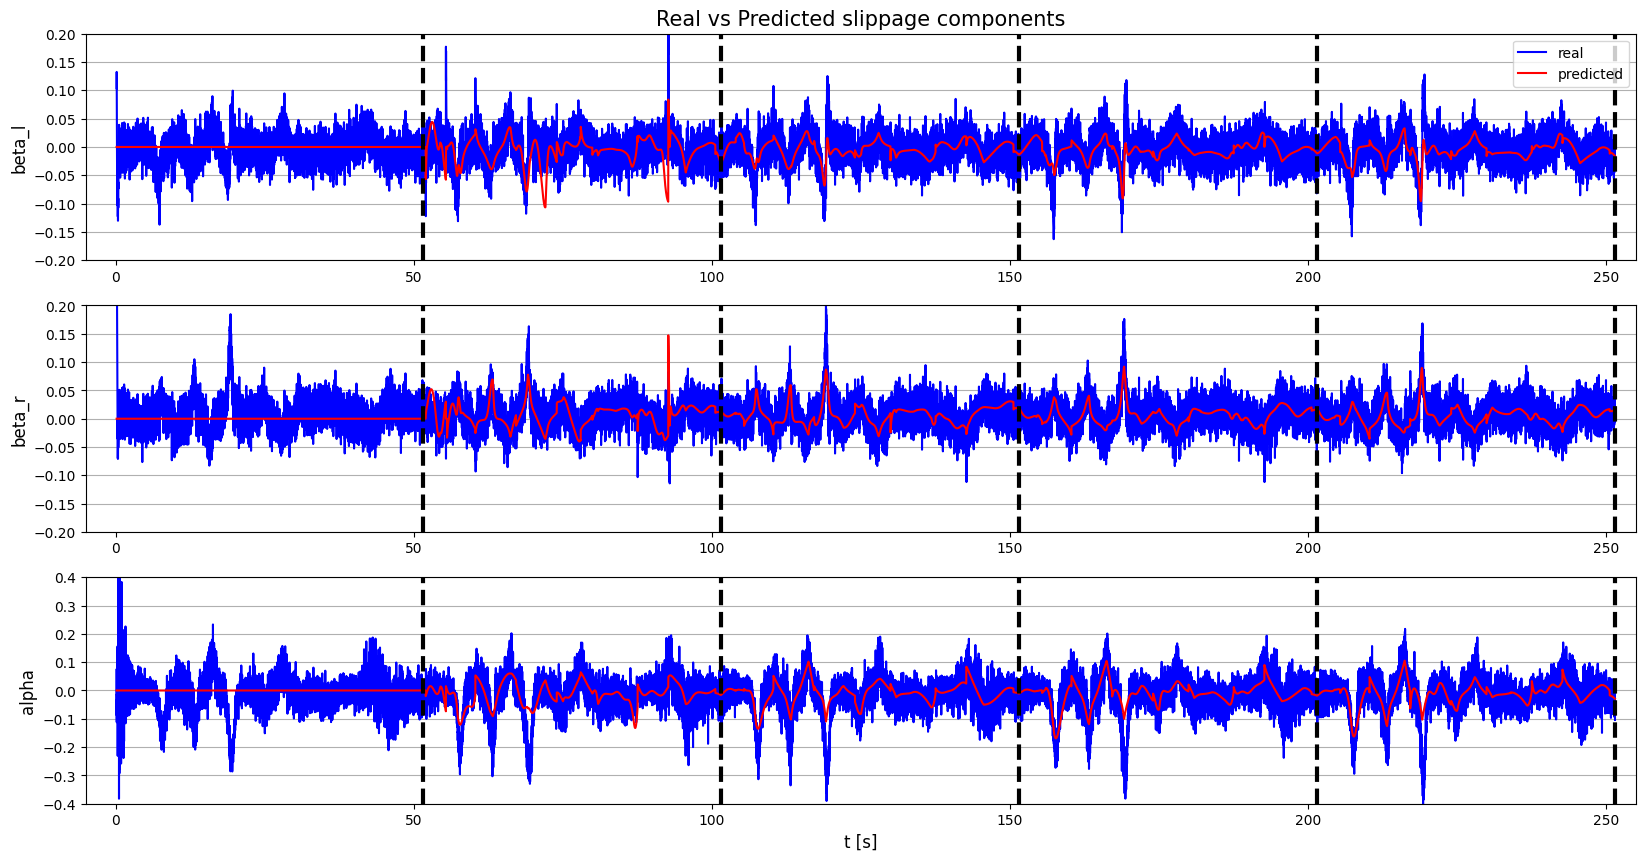

In [49]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.title("Real vs Predicted slippage components", fontsize=15)
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_l[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_l_pred[lap_idx[0]:lap_idx[-1]],
         "-r", label="predicted")
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.2,0.2)
plt.xlim(-5,255)
plt.ylabel("beta_l", fontsize=12)
plt.legend()
plt.grid(True, axis="y")

plt.subplot(3, 1, 2)
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_r[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], beta_r_pred[lap_idx[0]:lap_idx[-1]],
         "-r", label="control")
for t in time[lap_idx[1:]]:
    plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.2,0.2)
plt.xlim(-5,255)
plt.ylabel("beta_r", fontsize=12)
plt.grid(True, axis="y")

plt.subplot(3, 1, 3)
plt.plot(time[lap_idx[0]:lap_idx[-1]], alpha[lap_idx[0]:lap_idx[-1]], "-b", label="real")
plt.plot(time[lap_idx[0]:lap_idx[-1]], alpha_pred[lap_idx[0]:lap_idx[-1]],
         "-r", label="control")
for t in time[lap_idx[1:]]:
    plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
plt.ylim(-0.4,0.4)
plt.xlim(-5,255)
plt.ylabel("alpha", fontsize=12)
plt.xlabel("time [s]", fontsize=12)
plt.grid(True, axis="y")

plt.savefig(osp.join(data_path, "real_vs_pred.pdf"), dpi=500, bbox_inches='tight')
plt.show()

In [36]:
ex = np.array(joblib.load(osp.join(data_path, 'ex.bin')))
ey = np.array(joblib.load(osp.join(data_path, 'ey.bin')))
etheta = np.array(joblib.load(osp.join(data_path, 'etheta.bin')))

In [37]:
exy = np.linalg.norm(np.column_stack((ex, ey)), axis=1)

In [38]:
etheta = np.linalg.norm(etheta, axis=1)

In [39]:
ex_mean = np.array([ex[lap_idx[i]:lap_idx[i+1]].mean() for i in range(len(lap_idx)-1)])
ey_mean = np.array([ey[lap_idx[i]:lap_idx[i+1]].mean() for i in range(len(lap_idx)-1)])
etheta_mean = np.array([etheta[lap_idx[i]:lap_idx[i+1]].mean() for i in range(len(lap_idx)-1)])

In [40]:
exy_mean = np.linalg.norm(np.column_stack((ex_mean, ey_mean)), axis=1)

In [41]:
exy_mean_plot = np.zeros(len(ex))
for i in range(len(lap_idx)-1):
    exy_mean_plot[lap_idx[i]:lap_idx[i+1]] = exy_mean[i]

In [42]:
etheta_mean_plot = np.zeros(len(ex))
for i in range(len(lap_idx)-1):
    etheta_mean_plot[lap_idx[i]:lap_idx[i+1]] = etheta_mean[i]

In [45]:
# plt.figure(figsize=(20, 10))

# plt.subplot(2, 1, 1)
# plt.title("Tracking error", fontsize=15)
# # plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot[lap_idx[0]:lap_idx[-1]], color="red", linewidth=4) 
# plt.plot(time[lap_idx[0]:lap_idx[-1]], exy[lap_idx[0]:lap_idx[-1]], color="blue")
# plt.xlim(-5,255)
# for t in time[lap_idx[1:]]:
#     plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
# plt.ylabel("|xy| [m]", fontsize=12)
# plt.grid(True, axis="y")

# plt.subplot(2, 1, 2)
# # plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot[lap_idx[0]:lap_idx[-1]], color="red", linewidth=4) 
# plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta[lap_idx[0]:lap_idx[-1]], color="blue")
# for t in time[lap_idx[1:]]:
#     plt.axvline(t,  linestyle='dashed', linewidth=3, color="black")
# plt.xlim(-5,255)
# plt.ylabel("theta", fontsize=12)
# plt.grid(True, axis="y")

# # plt.savefig(osp.join(data_path, "real_vs_pred.pdf"), dpi=500, bbox_inches='tight')
# plt.show()

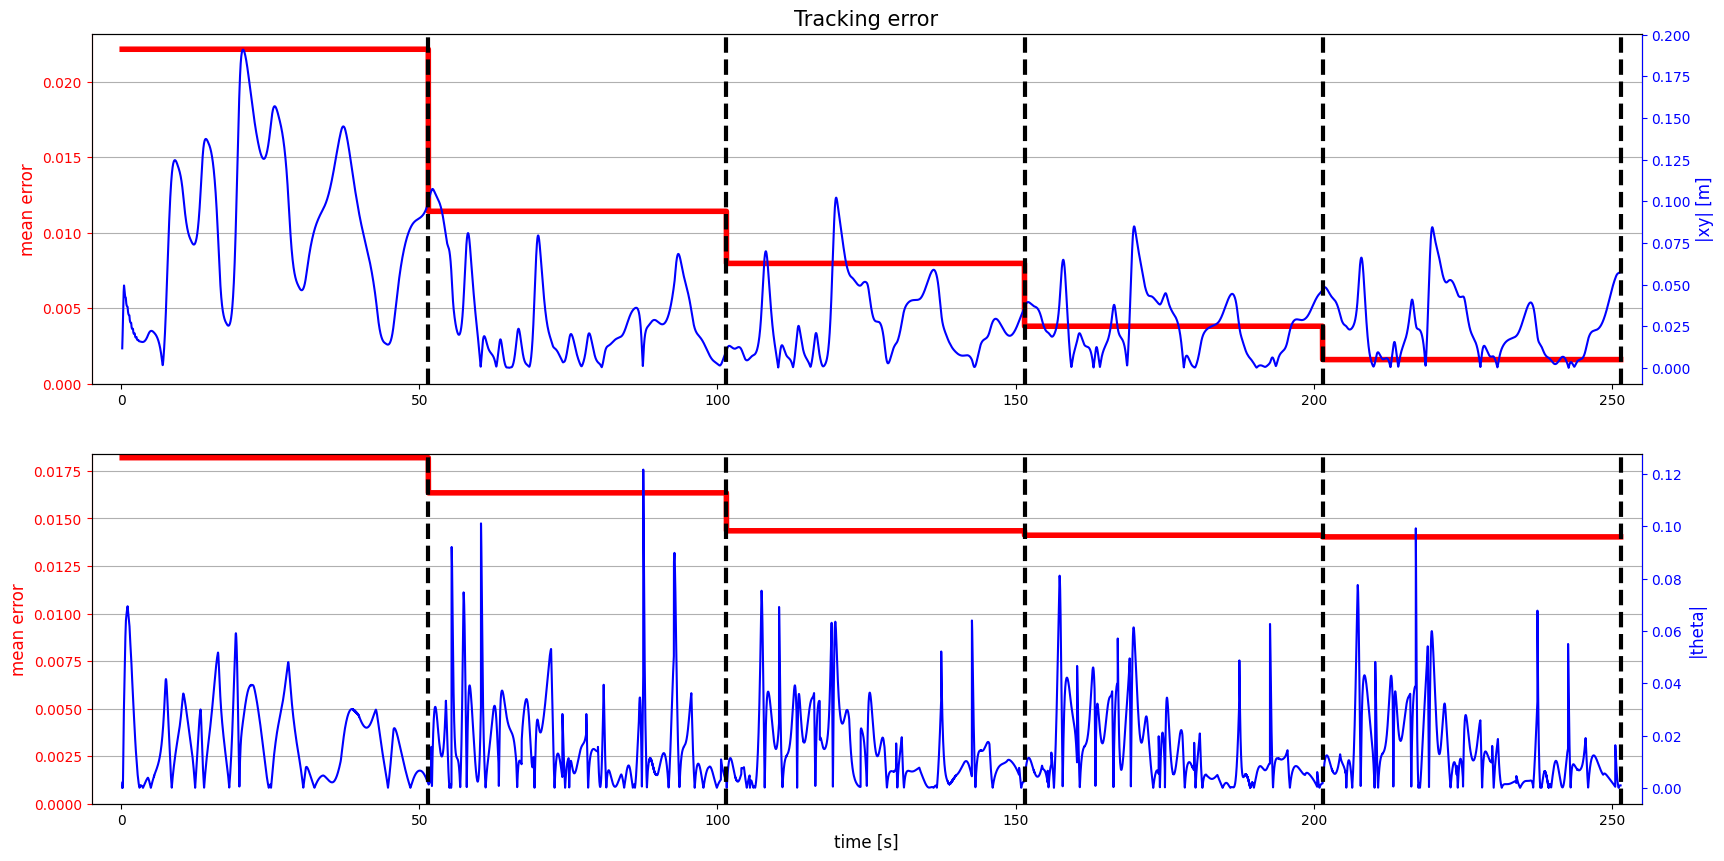

In [51]:
plt.figure(figsize=(20, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.title("Tracking error", fontsize=15)

# Plot the mean error
plt.plot(time[lap_idx[0]:lap_idx[-1]], exy_mean_plot[lap_idx[0]:lap_idx[-1]],
         color="red", linewidth=4, label='Mean Error')

# Create a secondary y-axis for the error
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot the error on the secondary y-axis
ax2.plot(time[lap_idx[0]:lap_idx[-1]], exy[lap_idx[0]:lap_idx[-1]], color="blue", label='Error')

# Set limits and labels
plt.xlim(-5, 255)
ax1.set_ylabel("mean error", color="red", fontsize=12)
ax1.set_ylim(0)
ax1.grid(True, axis="y")
ax2.set_ylabel("|xy| [m]", color="blue", fontsize=12)
ax1.tick_params(axis='y', colors='red')
ax1.spines['left'].set_color('red')
ax2.tick_params(axis='y', colors='blue')
ax2.spines['right'].set_color('blue')

# Add vertical lines
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")

# Add grid to the primary y-axis

# Second subplot
plt.subplot(2, 1, 2)

# Plot the mean error
plt.plot(time[lap_idx[0]:lap_idx[-1]], etheta_mean_plot[lap_idx[0]:lap_idx[-1]],
         color="red", linewidth=4, label='Mean Error')

# Create a secondary y-axis for the error
ax3 = plt.gca()
ax4 = ax3.twinx()

# Plot the error on the secondary y-axis
ax4.plot(time[lap_idx[0]:lap_idx[-1]], etheta[lap_idx[0]:lap_idx[-1]], color="blue", label='Error')

# Set limits and labels
plt.xlim(-5, 255)
ax3.set_ylabel("mean error", color="red", fontsize=12)
ax3.set_ylim(0)
ax3.grid(True, axis="y")
ax4.set_ylabel("|theta|", color="blue", fontsize=12)
ax3.set_xlabel("time [s]", fontsize=12)
ax3.tick_params(axis='y', colors='red')
ax3.spines['left'].set_color('red')
ax4.tick_params(axis='y', colors='blue')
ax4.spines['right'].set_color('blue')

# Add vertical lines
for t in time[lap_idx[1:]]:
    plt.axvline(t, linestyle='dashed', linewidth=3, color="black")


# Show the plot
plt.savefig(osp.join(data_path, "tracking_err.pdf"), dpi=500, bbox_inches='tight')
plt.show()

In [48]:
# plt.figure(figsize=(10, 5))

# plt.subplot(2, 1, 1)
# plt.title("Tracking error", fontsize=15)
# plt.plot( np.arange(1,len(exy_mean)+1),  exy_mean, color="red", linewidth=4) 
# plt.ylabel("|xy| [m]", fontsize=12)
# plt.ylim(0)
# plt.grid(True, axis="y")

# plt.subplot(2, 1, 2)
# plt.plot(np.arange(1,len(etheta_mean)+1),  etheta_mean, color="red", linewidth=4) 
# plt.ylabel("theta", fontsize=12)
# plt.grid(True, axis="y")
# plt.ylim(0)

# # plt.savefig(osp.join(data_path, "real_vs_pred.pdf"), dpi=500, bbox_inches='tight')
# plt.show()